<a href="https://colab.research.google.com/github/gabrielnichio/Deep-Learning-Learning/blob/main/DataLoading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with image datasets from Pytorch

In [17]:
import torch
import numpy as np
import time
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [18]:
args = {
    'batch_size': 100,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

args['device'] = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(args['device'])

cuda


## Loading the dataset
Loading the data and transforming it to tensor.

In [3]:
train_set = datasets.MNIST('./', train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
test_set = datasets.MNIST('./', train=False, transform=transforms.ToTensor(), target_transform=None, download=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.12MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Pytorch only load the dataset when required, i.e. when we iterate the dataset. This is a good resource because it doesn't require memory.

1 -> Load the sample from dataset

2 -> Apply the transformation

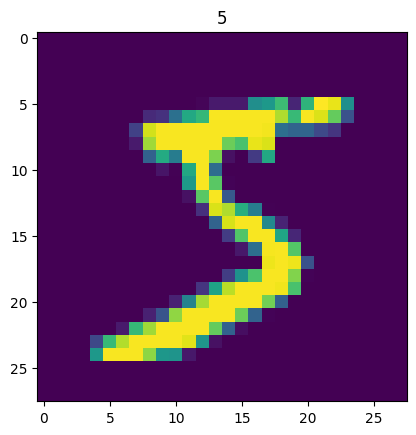

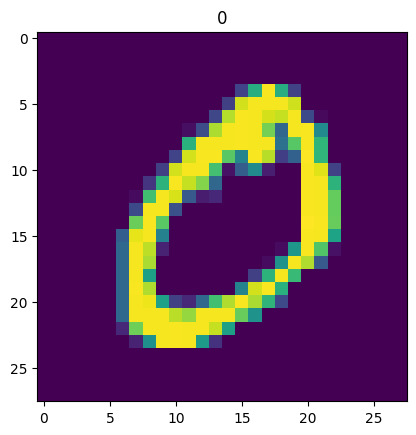

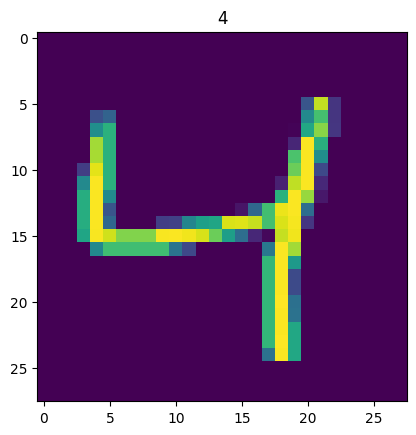

In [4]:
for i in range(3):
  data, label = train_set[i]

  plt.figure()
  plt.imshow(data[0])
  plt.title(label)

# Data Loader

one of the most powerfull tolls in pytorch.

loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)

- Batch management
- Shuffle
- Thread management

In [8]:
train_loader = DataLoader(train_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])
test_loader = DataLoader(test_set, batch_size=args['batch_size'], shuffle=True, num_workers=args['num_workers'])

# MLP

In [9]:
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):

    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.softmax(self.out(feature))

    return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU

# Loss and optimizer

In [12]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

# Training process

In [19]:
for epoch in range(args['num_epochs']):

  epoch_loss = []

  init = time.time()

  for batch in train_loader:
    data, label = batch

    data = data.to(args['device'])
    label = label.to(args['device'])

    pred = net(data)
    loss = criterion(pred, label)
    epoch_loss.append(loss.cpu().data)

    loss.backward()
    optimizer.step()

  end = time.time()
  epoch_loss = np.asarray(epoch_loss)

  print(f'Epoch: {epoch}, epoch_mean: {epoch_loss.mean():.2f}, epoch_std: {epoch_loss.std():.2f}, time: {init-end:.4f}')

Epoch: 0, epoch_mean: 2.35, epoch_std: 0.07, time: -14.7216
Epoch: 1, epoch_mean: 2.35, epoch_std: 0.07, time: -14.4806
Epoch: 2, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6700
Epoch: 3, epoch_mean: 2.35, epoch_std: 0.07, time: -14.7188
Epoch: 4, epoch_mean: 2.35, epoch_std: 0.07, time: -15.8085
Epoch: 5, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6060
Epoch: 6, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6300
Epoch: 7, epoch_mean: 2.35, epoch_std: 0.07, time: -14.8267
Epoch: 8, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6893
Epoch: 9, epoch_mean: 2.35, epoch_std: 0.07, time: -15.5098
Epoch: 10, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6722
Epoch: 11, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6682
Epoch: 12, epoch_mean: 2.35, epoch_std: 0.07, time: -14.6137
Epoch: 13, epoch_mean: 2.35, epoch_std: 0.07, time: -14.8392
Epoch: 14, epoch_mean: 2.35, epoch_std: 0.07, time: -14.7126
Epoch: 15, epoch_mean: 2.35, epoch_std: 0.07, time: -15.5038
Epoch: 16, epoch_mean: 2.35, epoch